In [32]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im=(im-im.mean())/im.std()

def scale(x0):
    min_,max_=x0.min(),x0.max()
    nx,ny=x0.shape
    x=np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            x[i,j]=(x0[i,j]-min_)/(max_-min_)
    return x

#plt.imshow(scale(im))
im_a=(scale(im)*255).astype(np.uint8)


tif = TIFF.open('fig2a.tif', mode='w')
 
# to write a image to tiff file
 
tif.write_image(im_a)

del tif

im_ = im.reshape(128, 8, 128,8).mean(-1).mean(1)
print(im_.mean(),im_.std())

im_b=(scale(im_)*255).astype(np.uint8)

tif = TIFF.open('fig2b.tif', mode='w')
 
# to write a image to tiff file
 
tif.write_image(im_b)

del tif

fft_im_=fft.dctn(im_)
im_c=(scale(fft_im_)*255).astype(np.uint8)

tif = TIFF.open('fig2c.tif', mode='w')

tif.write_image(im_c)

del tif

CCDLabel in readCCDimage TIFF Format
----> Using libtiff...
0.0 0.9947948416756596


CCDLabel in readCCDimage TIFF Format
----> Using libtiff...


(-0.5, 127.5, -0.5, 127.5)

<Figure size 432x288 with 0 Axes>

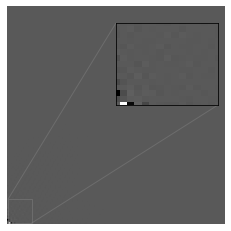

In [72]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft


import lauetools.LaueTools.IOimagefile as IOimage

from libtiff import TIFF

filename="140_S027_C090.TIFF"
dirname="../XRD_images/2nd_saving/"
im=IOimage.readCCDimage(filename=filename,CCDLabel='TIFF Format',dirname=dirname)[0]

im_a=(im-im.mean())/im.std()

plt.axis('off')
plt.imshow(im_a,cmap='gray')
plt.savefig('fig2a.tif',format='tif',bbox_inches ='tight')
plt.clf()

im_b = im_a.reshape(128, 8, 128,8).mean(-1).mean(1)

plt.axis('off')
plt.imshow(im_b,cmap='gray')
plt.savefig('fig2b.tif',format='tif',bbox_inches ='tight')
plt.clf()

im_c=fft.dctn(im_b)

fig, ax = plt.subplots(figsize=[5, 4])

ax.imshow(im_c,cmap='gray',origin='lower')
# inset axes....
axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.imshow(im_c,origin='upper',cmap='gray')
# sub region of the original image
x1, x2, y1, y2 = 0,14,0,14
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.tick_params(left=False,right=False,top=False,bottom=False)

axins.set_xticklabels('')
axins.set_yticklabels('')

ax.indicate_inset_zoom(axins)

ax.axis('off')


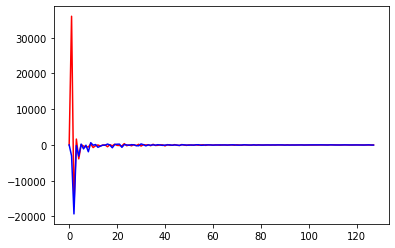

In [48]:
#plt.yscale('log')
plt.plot(np.arange(128),im_c[0,:],'r')
plt.plot(np.arange(128),im_c[:,0],'b')